# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from math import sqrt
medical = pd.read_csv('data/insurance2.csv')


from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
from math import sqrt

In [174]:
medical.shape

(1338, 8)

In [175]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__the charges distribution is not normal and skewed to the lower side. The sigma is very big.  

mean and sigma are 13270.42, 12110.01 


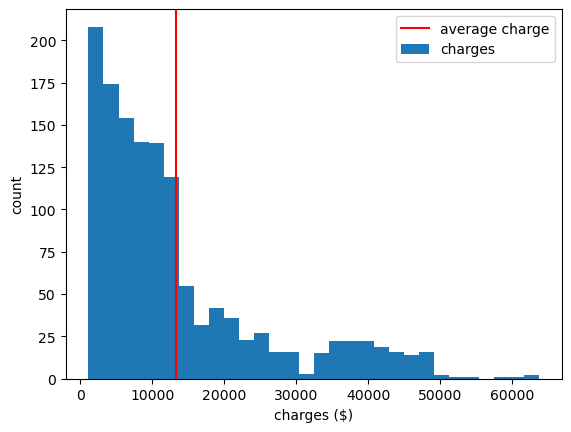

In [209]:
mean=medical.charges.mean()
sigma=medical.charges.std()
print("mean and sigma are {:.2f}, {:.2f} ".format(mean,sigma))

_=plt.hist(medical.charges,bins=30)
_=plt.axvline(mean,color='r')
_=plt.xlabel("charges ($)")
_=plt.ylabel("count")
_=plt.legend(["average charge","charges"],loc='upper right')



__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__Even though these data are not normally distributed, the administrator’s main concern is whether the average charge, not the individual charge, fell below 12000. So the mean is the main interest and we can make inferences about that. The CLT says the sampling distribution of the mean will always be normal distribution as long as the sample size is large enough and regardless of the type of population distribution. The sample we have is random, continuous, and independent which is suitable for a one-sample t-test. 
 


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 

1. 95% is the right confidence interval and it is one-sided interval because the administration only worries about the actual average charge has fallen below 12,000.  

2. The administator should not worry because the lower side of 95% confidence interval is 12,725.50 which is higher than 12,000. 

In [177]:
n=len(medical.charges)
t_mean=medical.charges.mean()
t_sigma=medical.charges.std()
n,t_mean,t_sigma

(1338, 13270.422265141257, 12110.011236693994)

In [178]:
t_critical=t.ppf(0.05,df=n-1)
t_critical

-1.6459941145571324

In [179]:
lower_CI=mean+(t_critical*t_sigma/sqrt(n))
lower_CI

12725.48718381623

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
There are two different groups with and without insurance. They are independent samples from the population so a two-sample t-test is recommended with the assumption of equal variances.

__Null hypothesis:__ people wrth insurance are charged a same amount to those without.
__Alternative hypothesis:__ people with insurance are charged a different amount to those without.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

n0, n1, mean0, mean1, sigma0, and sigm1 respectively 555.0 783.0 8821.4 16423.9 6446.5


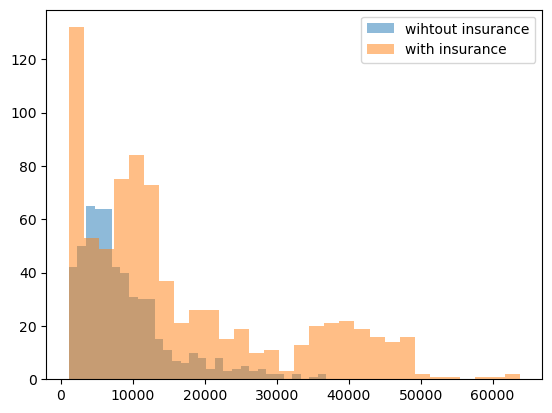

In [189]:

ins0=medical[medical.insuranceclaim==0]['charges']
ins1=medical[medical.insuranceclaim==1]['charges']

n0=len(ins0)
n1=len(ins1)

mean0=ins0.mean()
mean1=ins1.mean()

sigma0=ins0.std()
sigma1=ins1.std()
print("n0, n1, mean0, mean1, sigma0, and sigm1 respectively {:.1f} {:.1f} {:.1f} {:.1f} {:.1f}".format( n0,n1,mean0,mean1,sigma0,sigma1))

plt.hist(ins0,bins=30,alpha=0.5,label='wihtout insurance')
plt.hist(ins1,bins=30,alpha=0.5,label='with insurance')
plt.legend(loc='upper right')
plt.show()

In [190]:
#calculate pooled sigma
sigma_p=sqrt(((n0-1)*(sigma0**2)+(n1-1)*(sigma1**2))/(n0+n1-2))

In [191]:
#calcualte the t and p values
from scipy.stats import t


t_value=(mean0-mean1)/(sigma_p*sqrt(1/n0+1/n1))
p_value=2*t.cdf(t_value,df=n0+n1-2)
t_value,p_value

(-11.89329903087671, 4.461230231620972e-31)

In [192]:
# calculate t and p values using scipy
# Import the library
import scipy.stats as t


t.ttest_ind(a=ins0, b=ins1)



Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__No,I do not see the z-test under statistical test function in scipy.stats. is it becassue we usually don't know the actual mean and standard deviation of the population>

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test